Question 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow

In [2]:
df_que1 = pd.read_csv("House_Rent_Dataset.csv")
df_que1.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [3]:
df_que1 =  df_que1.drop(['Posted On', "Floor", "Area Type", "Area Locality", "City", "Tenant Preferred", "Point of Contact"], axis=1)

In [4]:
df_que1.head()

,BHK,Rent,Size,Furnishing Status,Bathroom
0,2,10000,1100,Unfurnished,2
1,2,20000,800,Semi-Furnished,1
2,2,17000,1000,Semi-Furnished,1
3,2,10000,800,Unfurnished,1
4,2,7500,850,Unfurnished,1


In [5]:
df_que1["Furnishing Status"].unique()

array(['Unfurnished', 'Semi-Furnished', 'Furnished'], dtype=object)

In [6]:
df_que1['Furnishing Status'] = df_que1['Furnishing Status'].replace(['Unfurnished'],'0')
df_que1['Furnishing Status'] = df_que1['Furnishing Status'].replace(['Semi-Furnished'],'1')
df_que1['Furnishing Status'] = df_que1['Furnishing Status'].replace(['Furnished'],'2')
df_que1['Furnishing Status'] = df_que1['Furnishing Status'].astype('int')

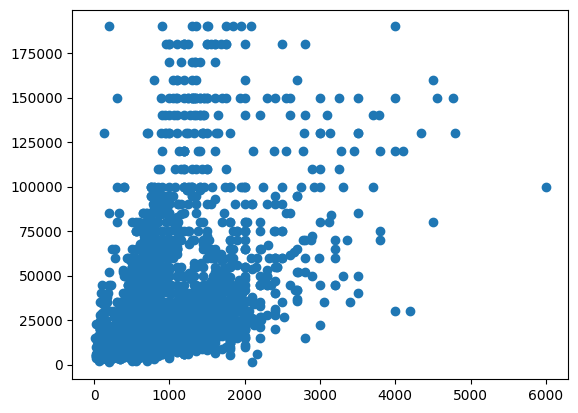

In [7]:
size = df_que1[["Size"]].loc[df_que1["Rent"] < 200000]
rent = df_que1["Rent"].loc[df_que1["Rent"] < 200000]

plt.scatter(size,rent)

In [8]:
features = df_que1[["Size", "Furnishing Status", "Bathroom"]].loc[df_que1["Rent"] < 200000]
target = df_que1["Rent"].loc[df_que1["Rent"] < 200000]
target = np.array(target)

In [9]:
features = np.array(features)
features.shape

(4632, 3)

In [10]:
model = tensorflow.keras.Sequential([
    tensorflow.keras.layers.Dense(256,input_shape = (3,)),
    tensorflow.keras.layers.Dense(128,activation= 'relu'),
    tensorflow.keras.layers.Dropout(0.4),
    tensorflow.keras.layers.Dense(64,activation= 'relu'),
    tensorflow.keras.layers.Dense(32,activation= 'relu'),
    tensorflow.keras.layers.Dropout(0.2),
    tensorflow.keras.layers.Dense(16,activation= 'relu'),
    tensorflow.keras.layers.Dense(1,activation= 'relu'),
])

In [11]:
model.compile(loss ="mae",optimizer=tensorflow.keras.optimizers.Adam())

In [12]:
feaatures = np.asarray(features).astype(np.int)

C:\Users\ishaa\AppData\Local\Temp\ipykernel_14556\2389158996.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  feaatures = np.asarray(features).astype(np.int)


In [13]:
model.fit(features,target,batch_size=64,shuffle=True,verbose=1,epochs=100,validation_split=0.2)

Epoch 1/100
58/58 [==============================] - 2s 8ms/step - loss: 22555.8457 - val_loss: 7489.0981
Epoch 2/100
58/58 [==============================] - 0s 4ms/step - loss: 17412.7793 - val_loss: 8777.3809
Epoch 3/100
58/58 [==============================] - 0s 4ms/step - loss: 17425.9395 - val_loss: 8048.3628
Epoch 4/100
58/58 [==============================] - 0s 4ms/step - loss: 17404.2285 - val_loss: 8477.9863
Epoch 5/100
58/58 [==============================] - 0s 4ms/step - loss: 17343.0605 - val_loss: 8824.3486
Epoch 6/100
58/58 [==============================] - 0s 5ms/step - loss: 17371.6309 - val_loss: 8607.6279
Epoch 7/100
58/58 [==============================] - 0s 4ms/step - loss: 17365.4883 - val_loss: 8093.4849
Epoch 8/100
58/58 [==============================] - 0s 5ms/step - loss: 17464.3691 - val_loss: 10653.3887
Epoch 9/100
58/58 [==============================] - 0s 4ms/step - loss: 17320.2402 - val_loss: 8457.0020
Epoch 10/100
58/58 [=========================

Question 2

In [14]:
df_que2 = pd.read_csv("train2.csv")
df_que2.head()

,x,y,color
0,-4.956506,25.706334,0.0
1,2.897218,10.359784,0.0
2,-4.488273,22.113311,0.0
3,3.823152,15.665060,0.0
4,4.425201,21.118726,0.0


In [15]:
x_train2 = df_que2[["x", "y"]]
y_train2 = df_que2[["color"]]
x_train2 = np.array(x_train2)
x_train2[0]

array([-4.95650637, 25.70633379])

In [16]:
model2 = tensorflow.keras.Sequential([
    tensorflow.keras.layers.Dense(64,input_shape = (2,)),
    tensorflow.keras.layers.Dense(32,activation= 'relu'),
    tensorflow.keras.layers.Dropout(0.3),
    tensorflow.keras.layers.Dense(16,activation= 'relu'),
    tensorflow.keras.layers.Dense(1,activation= 'sigmoid'),  
])

In [17]:
model2.compile(loss ="binary_crossentropy",optimizer=tensorflow.keras.optimizers.Adam())

In [18]:
model2.fit(x_train2,y_train2,batch_size=64,shuffle=True,verbose=1,epochs=10,validation_split=0.2)

Epoch 1/10
50/50 [==============================] - 1s 5ms/step - loss: 0.6131 - val_loss: 0.8293
Epoch 2/10
50/50 [==============================] - 0s 2ms/step - loss: 0.5485 - val_loss: 0.6823
Epoch 3/10
50/50 [==============================] - 0s 2ms/step - loss: 0.5067 - val_loss: 0.6778
Epoch 4/10
50/50 [==============================] - 0s 2ms/step - loss: 0.4796 - val_loss: 0.5708
Epoch 5/10
50/50 [==============================] - 0s 2ms/step - loss: 0.4488 - val_loss: 0.5625
Epoch 6/10
50/50 [==============================] - 0s 2ms/step - loss: 0.4051 - val_loss: 0.5171
Epoch 7/10
50/50 [==============================] - 0s 2ms/step - loss: 0.3642 - val_loss: 0.4837
Epoch 8/10
50/50 [==============================] - 0s 2ms/step - loss: 0.3218 - val_loss: 0.3358
Epoch 9/10
50/50 [==============================] - 0s 2ms/step - loss: 0.2822 - val_loss: 0.5157
Epoch 10/10
50/50 [==============================] - 0s 2ms/step - loss: 0.2581 - val_loss: 0.3918


In [19]:
df_que2_test = pd.read_csv("test2.csv")
df_que2_test.head()

,x,y,color
0,-0.709694,1.902953,0.0
1,1.358063,2.923887,0.0
2,-0.684174,2.125850,0.0
3,3.190384,11.425374,0.0
4,-1.225524,3.178416,0.0


In [20]:
y_pred2 = model2.predict(df_que2_test[["x","y"]])

32/32 [==============================] - 0s 1ms/step


In [21]:
y_pred2 = (y_pred2 > 0.5).astype(int).reshape(-1,1)

In [22]:
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(df_que2_test[["color"]], y_pred2)

0.887

Question 3

In [23]:
df_que3 = pd.read_csv("train3.csv")
df_que3.head()

,x,y,color
0,0.129270,1.979720,red
1,-0.380831,1.693519,red
2,0.718693,1.791793,red
3,0.722922,0.620655,red
4,-0.432689,0.541550,red


In [24]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(df_que3["color"])
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
color_encoded = onehot_encoder.fit_transform(integer_encoded)

d:\Study Material\SOC POSE\env\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [25]:
x_train3 = df_que3[["x", "y"]]
y_train3 = color_encoded
x_train3 = np.array(x_train3)
y_train3 = np.array(y_train3)

In [26]:
model3 = tensorflow.keras.Sequential([
    tensorflow.keras.layers.Dense(64,input_dim=2),
    tensorflow.keras.layers.Dense(64,activation= 'relu'),
    tensorflow.keras.layers.Dropout(0.3),
    tensorflow.keras.layers.Dense(64,activation= 'relu'),
    tensorflow.keras.layers.Dense(6,activation= 'softmax'),  
])

In [27]:
model3.compile(loss ="binary_crossentropy",optimizer=tensorflow.keras.optimizers.Adam())

In [28]:
model3.fit(x_train3,y_train3,batch_size=64,shuffle=True,verbose=1,epochs=10,validation_split=0.2)

Epoch 1/10
75/75 [==============================] - 1s 4ms/step - loss: 0.3751 - val_loss: 0.9330
Epoch 2/10
75/75 [==============================] - 0s 2ms/step - loss: 0.1793 - val_loss: 1.3878
Epoch 3/10
75/75 [==============================] - 0s 2ms/step - loss: 0.1136 - val_loss: 1.6058
Epoch 4/10
75/75 [==============================] - 0s 2ms/step - loss: 0.0824 - val_loss: 1.7336
Epoch 5/10
75/75 [==============================] - 0s 2ms/step - loss: 0.0665 - val_loss: 1.8541
Epoch 6/10
75/75 [==============================] - 0s 2ms/step - loss: 0.0540 - val_loss: 2.0142
Epoch 7/10
75/75 [==============================] - 0s 2ms/step - loss: 0.0484 - val_loss: 2.1940
Epoch 8/10
75/75 [==============================] - 0s 2ms/step - loss: 0.0405 - val_loss: 2.3217
Epoch 9/10
75/75 [==============================] - 0s 2ms/step - loss: 0.0345 - val_loss: 2.4628
Epoch 10/10
75/75 [==============================] - 0s 2ms/step - loss: 0.0325 - val_loss: 2.5802


In [29]:
df_que3_test = pd.read_csv("test3.csv")
df_que3_test.head()

,x,y,color
0,-0.173868,1.381852,red
1,-0.724148,1.883008,red
2,-0.423915,1.408297,red
3,-0.650162,1.296067,red
4,0.957933,0.633111,red


In [30]:
x_test3 = df_que3_test[["x", "y"]]
color_test = df_que3_test[["color"]]
x_test3 = np.array(x_test3).reshape(-1,2)
color_test = np.array(color_test)

In [31]:
predictions3 = model3.predict(df_que3_test[["x","y"]])

38/38 [==============================] - 0s 1ms/step


In [32]:
predicted_colors3 = label_encoder.inverse_transform(np.argmax(predictions3, axis=1))

In [33]:
balanced_accuracy_score(df_que3_test[["color"]], predicted_colors3)

0.8141666666666666

Question 4

In [34]:
df_que4 = pd.read_csv("train4.csv")
df_que4.head()

,x,y,color,marker
0,-0.765775,1.006452,red,^
1,0.229016,0.094320,red,^
2,0.189987,1.589141,red,^
3,0.580085,0.520488,red,^
4,0.292287,0.317852,red,^


In [35]:
label_encoder_color = LabelEncoder()
color4 = label_encoder_color.fit_transform(df_que4["color"])

label_encoder_marker = LabelEncoder()
marker4 = label_encoder_marker.fit_transform(df_que4["marker"])

In [36]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input

In [37]:
x_train4 = df_que4[["x", "y"]]
x_train4 = np.array(x_train4)
color4 = np.array(color4)
marker4 = np.array(marker4)

In [38]:
inputs = Input(shape=(2,))
x = Dense(64, activation='relu')(inputs)
x = Dense(64, activation='relu')(x)

color_output = Dense(len(label_encoder_color.classes_), activation='softmax', name='color')(x)

marker_output = Dense(len(label_encoder_marker.classes_), activation='softmax', name='marker')(x)

In [39]:
model4 = Model(inputs=inputs, outputs=[color_output, marker_output])

In [40]:
model4.compile(
    optimizer='adam',
    loss={'color': 'sparse_categorical_crossentropy', 'marker': 'sparse_categorical_crossentropy'},
    metrics={'color': 'accuracy', 'marker': 'accuracy'}
)

In [42]:
model4.fit(
    x_train4,
    {'color': color4, 'marker': marker4},
    epochs=100,
    batch_size=32,
    validation_split=0.2
)

Epoch 1/100
150/150 [==============================] - 2s 5ms/step - loss: 1.2982 - color_loss: 0.9459 - marker_loss: 0.3524 - color_accuracy: 0.6631 - marker_accuracy: 0.8765 - val_loss: 13.0058 - val_color_loss: 6.3355 - val_marker_loss: 6.6703 - val_color_accuracy: 0.1042 - val_marker_accuracy: 0.1667
Epoch 2/100
150/150 [==============================] - 0s 3ms/step - loss: 0.3443 - color_loss: 0.2782 - marker_loss: 0.0661 - color_accuracy: 0.9173 - marker_accuracy: 0.9829 - val_loss: 18.3068 - val_color_loss: 8.6294 - val_marker_loss: 9.6774 - val_color_accuracy: 0.1367 - val_marker_accuracy: 0.1667
Epoch 3/100
150/150 [==============================] - 0s 2ms/step - loss: 0.2039 - color_loss: 0.1642 - marker_loss: 0.0397 - color_accuracy: 0.9521 - marker_accuracy: 0.9908 - val_loss: 21.6395 - val_color_loss: 10.1438 - val_marker_loss: 11.4957 - val_color_accuracy: 0.1542 - val_marker_accuracy: 0.1667
Epoch 4/100
150/150 [==============================] - 0s 3ms/step - loss: 0.153

In [43]:
df_que4_test = pd.read_csv("test4.csv")
df_que4_test.head()

,x,y,color,marker
0,-0.129697,0.773598,red,^
1,0.341569,0.505299,red,^
2,0.168562,1.397924,red,^
3,-0.738458,0.097241,red,^
4,0.311101,1.669878,red,^


In [78]:
x_test4 = df_que4_test[["x", "y"]]
color_test4 = df_que4_test["color"]
x_test4 = np.array(x_test4).reshape(-1,2)
color_test4 = np.array(color_test4)
marker_test4 = df_que4_test["marker"]
marker_test4 = np.array(marker_test4)

In [79]:
color_predictions, marker_predictions = model4.predict(df_que4_test[["x","y"]])

38/38 [==============================] - 0s 1ms/step


In [80]:
predicted_colors = label_encoder_color.inverse_transform(np.argmax(color_predictions, axis=1))
predicted_markers = label_encoder_marker.inverse_transform(np.argmax(marker_predictions, axis=1))

In [81]:
predicted_colors = np.array(predicted_colors)
predicted_markers = np.array(predicted_markers)

In [84]:
balanced_accuracy_score(color_test4, predicted_colors)

0.8233333333333334

In [85]:
balanced_accuracy_score(marker_test4, predicted_markers)

0.6644444444444444